# Cross-Gen Biz Analysis
## EDA 01 - Data Overview
작성자: 이찬희
날짜: 2026-01-24 13:40:01
대주제 : 온/오프라인 연령대별 트렌드 분석으로 비즈니스 전략을 위한 인사이트 도출하기

<각자 최종 제출물>
핵심 지표 2개
그래프 2개
인사이트 3줄
전략 1줄 ?? 

<eda list>
df.shape
df.head()
df.info()
df.columns
df.isnull().sum()
df.describe()
df.duplicated().sum()



In [1]:
import pandas as pd

df_art = pd.read_csv("../../h&m dataset/articles_hm.csv")
df_cust = pd.read_csv("../../h&m dataset/customer_hm.csv")
df_tran = pd.read_csv("../../h&m dataset/transactions_hm.csv")

df_tran.head()

#price 가격이 왜 소수?..



,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1


In [ ]:
print("transactions:", df_tran.shape)


transactions: (1048575, 5)


In [ ]:
df_tran.duplicated().sum()  # 중복 데이터 확인

np.int64(8474)

In [ ]:
dup = df_tran[df_tran.duplicated(keep=False)]
dup.head()

,t_dat,customer_id,article_id,price,sales_channel_id
22,2019-07-22,8dab58de0006949327178882f1a746df8080ba76ded63d...,689005002,0.016932,2
55,2019-04-23,cc4d3851a32675f55632b575a4af702b6fa2b5c61e5f6a...,711188001,0.033881,2
74,2019-05-17,c8615f6b1a869573ca1c1e5183291cf7a53d40c6d4cd6b...,698255002,0.025407,2
206,2019-03-26,d48249bd9e096080a6c9743addf8485ba148838f451dbe...,716672001,0.024186,2
213,2019-06-23,004b8945bc2e2831c1bc54d72483c263840300be73a325...,598811005,0.006763,2


In [2]:
df_tran.info()

#행 개수 1,048,575개에 대한 결측치 문제없음... (행 약 104만개;)

#각 컬럼별 의미 정리
#t_dat: 구매일(근데 왜 string..? > 나중에 날짜타입으로 정리하면 좋을듯)
#customer_id: 고객 고유 아이디  (더러운 id)
#article_id: 상품 고유 아이디  
#price: 거래 가격 (수량(quantity) 정보X )
#price를 곧바로 매출액으로 해석해야 하며, “구매 단가 총합” = “매출액” 으로 간주 가능)
#sales_channel_id: 판매 채널 아이디 (1: 오프라인 매장, 2: 온라인 매장)


<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  str    
 1   customer_id       1048575 non-null  str    
 2   article_id        1048575 non-null  int64  
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(2), str(2)
memory usage: 40.0 MB


In [ ]:
df_tran["t_dat"] = pd.to_datetime(df_tran["t_dat"])   #날짜 타입으로 변환

In [ ]:
df_tran.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1048575 non-null  datetime64[us]
 1   customer_id       1048575 non-null  str           
 2   article_id        1048575 non-null  int64         
 3   price             1048575 non-null  float64       
 4   sales_channel_id  1048575 non-null  int64         
dtypes: datetime64[us](1), float64(1), int64(2), str(1)
memory usage: 40.0 MB


In [ ]:
df_tran["판매 채널"] = df_tran["sales_channel_id"].map({1: "오프라인", 2: "온라인"})

In [ ]:
df_tran.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1048575 non-null  datetime64[us]
 1   customer_id       1048575 non-null  str           
 2   article_id        1048575 non-null  int64         
 3   price             1048575 non-null  float64       
 4   sales_channel_id  1048575 non-null  int64         
 5   판매 채널             1048575 non-null  str           
dtypes: datetime64[us](1), float64(1), int64(2), str(2)
memory usage: 48.0 MB


In [ ]:
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,판매 채널
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,온라인
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,온라인
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,온라인
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,온라인
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,오프라인


In [ ]:
df_tran["판매 채널"].value_counts()

numbs = df_tran["판매 채널"].value_counts()
print("온라인:", f"{numbs['온라인']:,}")
print("오프라인:", f"{numbs['오프라인']:,}")
print("전체 거래 건수:", f"{df_tran.shape[0]:,}")

온라인: 729,192
오프라인: 319,383
전체 거래 건수: 1,048,575


In [ ]:
#통화 단위(SEK, 스웨덴 크로나) !달러나 원화로 혼동x
#표기법 수정하자.. e+? = *10^ e-?= /10^
df_tran['price'].describe()


count    1.048575e+06
mean     2.777915e-02
std      1.935764e-02
min      2.372880e-04
25%      1.523729e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.067797e-01
Name: price, dtype: float64

In [16]:
len(transactions[transactions["price"] >= 0.1])
len(transactions[transactions["price"] >= 0.2])
len(transactions[transactions["price"] >= 0.3])
len(transactions[transactions["price"] >= 0.4])
len(transactions[transactions["price"] >= 0.5])

print("price가 0.1 이상:", len(transactions[transactions["price"] >= 0.1]))
print("price가 0.2 이상:", len(transactions[transactions["price"] >= 0.2]))
print("price가 0.3 이상:", len(transactions[transactions["price"] >= 0.3]))
print("price가 0.4 이상:", len(transactions[transactions["price"] >= 0.4]))
print("price가 0.5 이상:", len(transactions[transactions["price"] >= 0.5]))
#전체 약 1,048,575건 중에서:
#0.1 이상: 10,803건 (약 1%)
#0.2 이상: 724건 (약 0.07%)
#0.3 이상: 127건 (약 0.01%)
#0.4 이상: 29건 (약 0.003%)
#0.5 이상: 2건 (약 0.0002%)

price가 0.1 이상: 10803
price가 0.2 이상: 724
price가 0.3 이상: 127
price가 0.4 이상: 29
price가 0.5 이상: 2


In [17]:
high_price_transactions = transactions[transactions["price"] >= 0.4]

high_price_transactions['sales_channel_id'].replace({1: 'Offline', 2: 'Online'}).value_counts()


sales_channel_id
Online    29
Name: count, dtype: int64

In [ ]:
df_tran["t_dat"].describe()

count                       1048575
mean     2019-06-27 12:01:40.730991
min             2019-01-01 00:00:00
25%             2019-04-08 00:00:00
50%             2019-06-25 00:00:00
75%             2019-09-17 00:00:00
max             2019-12-31 00:00:00
Name: t_dat, dtype: object

In [18]:
import matplotlib.pyplot as plt

In [ ]:
df_tran['year_month'] = df_tran['t_dat'].dt.to_period('M')

In [ ]:
monthly_sales = df_tran.groupby('year_month').size()

In [ ]:
monthly_price = df_tran.groupby('year_month')['price'].sum()

In [25]:
print(monthly_price)

year_month
2019-01    2148.279639
2019-02    2006.034201
2019-03    2395.173487
2019-04    2725.229843
2019-05    2768.568961
2019-06    3113.444654
2019-07    2571.945537
2019-08    1960.310828
2019-09    2581.655388
2019-10    2376.303726
2019-11    2482.021880
2019-12    1999.556979
Freq: M, Name: price, dtype: float64


In [27]:
best_month = monthly_price.idxmax()
best_value = monthly_price.max()

print("가장 매출이 높은 달:", best_month)
print("그 달의 매출:", best_value)


가장 매출이 높은 달: 2019-06
그 달의 매출: 3113.444654044


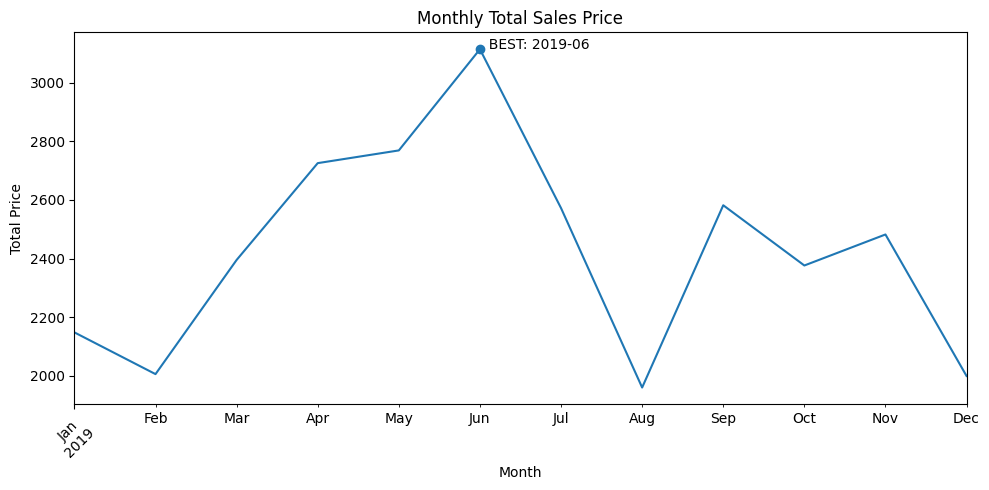

In [28]:
plt.figure(figsize=(10,5))
monthly_price.plot()

plt.scatter(best_month.to_timestamp(), best_value)
plt.text(best_month.to_timestamp(), best_value, 
         f"  BEST: {best_month}", fontsize=10)

plt.title("Monthly Total Sales Price")
plt.xlabel("Month")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
print(monthly_sales)

year_month
2019-01     81248
2019-02     73730
2019-03     81858
2019-04     94073
2019-05     99728
2019-06    122043
2019-07    115505
2019-08     80219
2019-09     78545
2019-10     73820
2019-11     76358
2019-12     71448
Freq: M, dtype: int64


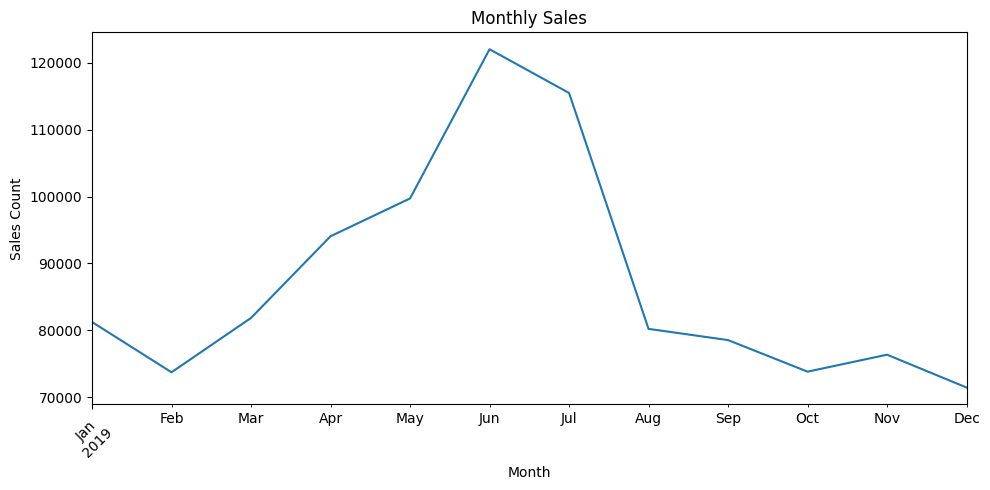

In [22]:
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()